---
title: "이상치의 영향 | 아이스크림"
author: "강신성"
date: "2023-10-18"
categories: [python, outlier]
---




> 회귀분석에서 이상치를 처리하는 방법에 대해서 알아보자!

## 1. 라이브러리 imports

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt

## 2. Data

> 오늘 사용할 데이터는 날씨와 아이스크림 판매가 엮인 연속형 자료이다.

In [2]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 200
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})
df_train

,temp,ice_sales
0,-4.1,200.000000
1,-3.7,9.234175
2,-3.0,9.642778
3,-1.3,9.657894
4,-0.5,9.987787
...,...,...
95,12.4,17.508688
96,13.4,17.105376
97,14.7,17.164930
98,15.0,18.555388


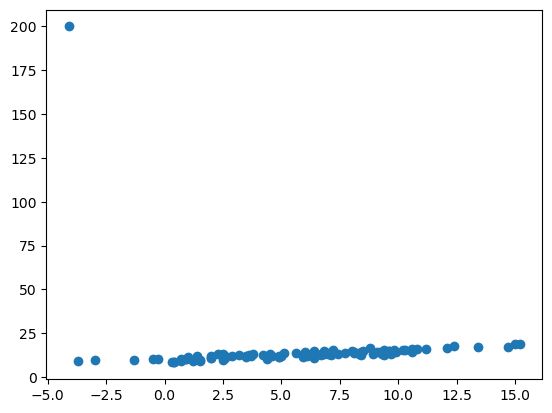

In [4]:
plt.plot(df_train.temp, df_train.ice_sales, 'o')

* 상상 : 온도가 -4.1인 지점에서 "썰매축제"가 열렸다고 가정하자. 그래서 사람이 많이 오고 아이스크림이 많이 팔렸다. ~(아 그렇다고 해줘요.)~

## 3. 분석


\- 해당 데이터를 선형 회귀로 적합

In [5]:
# step1
X = df_train[['temp']]
y = df_train[['ice_sales']]

# step2
predictr = sklearn.linear_model.LinearRegression()

# step3
predictr.fit(X, y)

# step4
df_train.assign(ice_sales_hat = predictr.predict(X))

,temp,ice_sales,ice_sales_hat
0,-4.1,200.000000,20.989373
1,-3.7,9.234175,20.731457
2,-3.0,9.642778,20.280103
3,-1.3,9.657894,19.183959
4,-0.5,9.987787,18.668126
...,...,...,...
95,12.4,17.508688,10.350324
96,13.4,17.105376,9.705533
97,14.7,17.164930,8.867305
98,15.0,18.555388,8.673867


In [10]:
predictr.coef_

array([[-0.64479089]])

> 음수가 나오네? 뭔가 이상하다...

\- 시각화

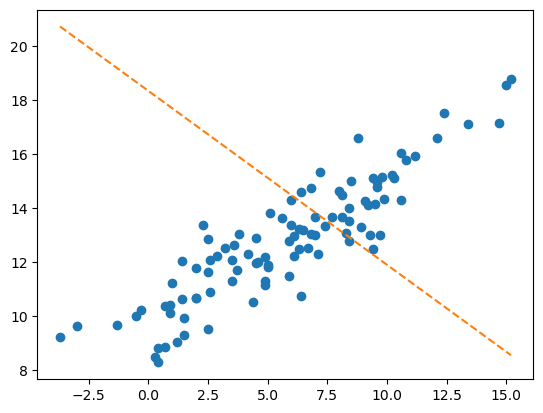

In [20]:
df_predict = df_train.assign(ice_sales_hat = predictr.predict(X))

plt.plot(df_predict.temp[1:], df_predict.ice_sales[1:], 'o')
plt.plot(df_predict.temp[1:], df_predict.ice_sales_hat[1:], '--')
plt.show()

#plt.plot(df_predict.temp, df_predict.ice_sales, 'o')
#plt.plot(df_predict.temp, df_predict.ice_sales_hat, '--')

\- 새로운 unseen data를 가정, 데이터는 온도가 12.5~18에 걸쳐있다고 하자.

In [21]:
df_predict

,temp,ice_sales,ice_sales_hat
0,-4.1,200.000000,20.989373
1,-3.7,9.234175,20.731457
2,-3.0,9.642778,20.280103
3,-1.3,9.657894,19.183959
4,-0.5,9.987787,18.668126
...,...,...,...
95,12.4,17.508688,10.350324
96,13.4,17.105376,9.705533
97,14.7,17.164930,8.867305
98,15.0,18.555388,8.673867


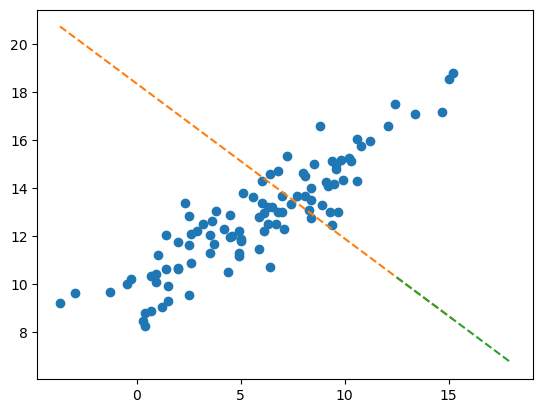

In [23]:
XX = df_test = pd.DataFrame({'temp':np.linspace(12.5, 18, 50)})  ## 이중 저장도 되는듯

df_test['ice_sales_hat'] = predictr.predict(XX)

plt.plot(df_predict.temp[1:],df_predict.ice_sales[1:],'o')
plt.plot(df_predict.temp[1:],df_predict.ice_sales_hat[1:],'--')
plt.plot(df_test.temp,df_test.ice_sales_hat,'--')

* 온도가 올라갈수록 아이스크림 판매량은 줄어든다는 해석(더 온도가 올라간다면 판매량이 음수도 나오겠다.)

* 저 정도의 아웃라이어는 모형에서 제외하는 게 타당하지 않나?
> 하지만 저런 아웃라이어가 데이터의 가치가 있을 수도 있음.(그럼 그 데이터의 가치가 있는지 없는지는 어떻게 판단하지?

## 4. 결론

\- 딱히 정답이 없다...

> outlier가 결과를 완전히 바꾼다고 해도, 무작정 바꿀 순 없는 노릇이다. 세심한 주의가 필요하다.

앞으로 outlier를 어떻게 처리해야 할 지 알아보자.